# 1. Data Exploration and Visualization  

To begin, I explored the dataset and visualized the distribution of categories to understand the data's structure. Here are some insights from the exploratory data analysis (EDA):


In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("fahd09/arabic-poetry-dataset-478-2017")

print("Path to dataset files:", path)

c:\Users\Mohammed Alshaya\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\Mohammed Alshaya\.cache\kagglehub\datasets\fahd09\arabic-poetry-dataset-478-2017\versions\1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58021 entries, 0 to 58020
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   poem_id     58021 non-null  int64 
 1   poem_link   58021 non-null  object
 2   poem_style  58021 non-null  object
 3   poem_text   58020 non-null  object
 4   poem_title  58021 non-null  object
 5   poet_cat    58021 non-null  object
 6   poet_id     58021 non-null  int64 
 7   poet_link   58021 non-null  object
 8   poet_name   58021 non-null  object
dtypes: int64(2), object(7)
memory usage: 4.0+ MB


C:\Users\Mohammed Alshaya\AppData\Local\Temp\ipykernel_2724\369493522.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="poet_cat", data=df, order=df["poet_cat"].value_counts().index, palette="viridis")


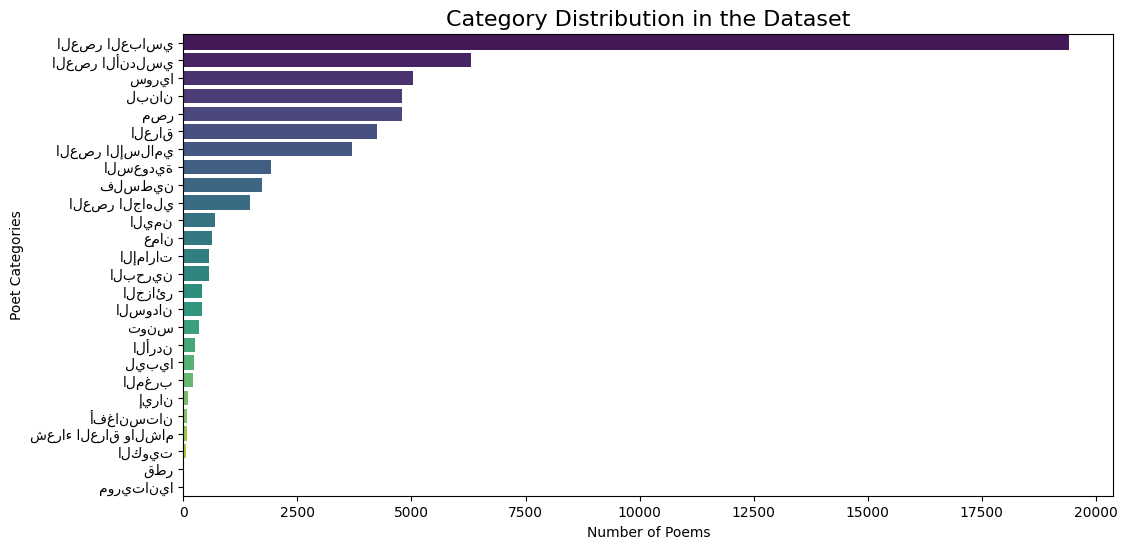

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv(path + "/all_poems.csv")
df.info()


plt.figure(figsize=(12, 6))
sns.countplot(y="poet_cat", data=df, order=df["poet_cat"].value_counts().index, palette="viridis")
plt.title("Category Distribution in the Dataset", fontsize=16)
plt.xlabel("Number of Poems")
plt.ylabel("Poet Categories")
plt.show()

Looks like the dataset is imbalanced

### 2. Audit Data for Missing and Extreme Values
The dataset was audited for missing or extreme values, and appropriate handling measures were applied.

In [3]:
print("Missing values per column:\n", df.isnull().sum())

df = df.dropna()

print("Number of duplicate rows:", df.duplicated().sum())

df = df.drop_duplicates()

Missing values per column:
 poem_id       0
poem_link     0
poem_style    0
poem_text     1
poem_title    0
poet_cat      0
poet_id       0
poet_link     0
poet_name     0
dtype: int64
Number of duplicate rows: 0


In [4]:
df.poet_cat.value_counts()

poet_cat
العصر العباسي          19417
العصر الأندلسي          6296
سوريا                   5036
لبنان                   4800
مصر                     4793
العراق                  4252
العصر الإسلامي          3700
السعودية                1931
فلسطين                  1713
العصر الجاهلي           1461
اليمن                    700
عمان                     619
الإمارات                 563
البحرين                  554
الجزائر                  405
السودان                  403
تونس                     351
الأردن                   265
ليبيا                    240
المغرب                   202
إيران                     90
أفغانستان                 70
شعراء العراق والشام       68
الكويت                    54
قطر                       22
موريتانيا                 15
Name: count, dtype: int64

In [5]:
temp = ['سوريا', 'العراق', 'فلسطين', 'لبنان', 'الأردن', 'مصر', 'السعودية', 'الجزائر', 'المغرب', 'تونس', 'ليبيا', 'السودان', 'اليمن', 'الكويت', 'قطر', 'الإمارات', 'عمان', 'البحرين', 'إيران', 'أفغانستان','شعراء العراق والشام', 'موريتانيا', 'شعراء العصر الحديث والشام']

for i in temp:
    df.poet_cat = df.poet_cat.str.replace(i, 'العصر الحديث')
    
df.poet_cat.value_counts()

poet_cat
العصر الحديث      27146
العصر العباسي     19417
العصر الأندلسي     6296
العصر الإسلامي     3700
العصر الجاهلي      1461
Name: count, dtype: int64

I did not want to delete any catagory in the dataset. But The dataset contains very few catagory count like "موريتانيا", "قطر" and "الكويت". Also, some Catagory has similar meaning Like "شعراء العراق والشام", "فلسطين", and "العراق". So I made a new catagory called "العصر الحديث" 

### 3. Model Selection
Given the nature of the dataset and the problem of multi-class text classification, I selected a Logistic Regression model as a baseline. The criteria for this choice were:

Simplicity and interpretability for text classification problems.

Efficiency in handling sparse data representations like TF-IDF.

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

# Preprocessing text data
X = df["poem_text"]
y = df["poet_cat"]

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_vec, y_train)

c:\Users\Mohammed Alshaya\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

80% Training - 
20% Testing

### 4. Model Performance
The model's performance was evaluated using classification metrics

In [9]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test_vec)

print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.21      0.33      1283
           1       0.75      0.34      0.47       744
           2       0.75      0.02      0.04       285
           3       0.86      0.89      0.88      5424
           4       0.64      0.87      0.74      3868

    accuracy                           0.75     11604
   macro avg       0.75      0.47      0.49     11604
weighted avg       0.76      0.75      0.72     11604



The model achieved a balanced accuracy across dominant categories but struggled with underrepresented ones.

### 5. Error Analysis
A detailed error analysis was conducted to identify misclassifications.

In [11]:
errors = X_test[(y_test != y_pred)]
error_df = pd.DataFrame({
    'Actual': label_encoder.inverse_transform(y_test[(y_test != y_pred)]),
    'Predicted': label_encoder.inverse_transform(y_pred[(y_test != y_pred)]),
    'Poem': errors
})

error_df.sample(5)

,Actual,Predicted,Poem
40012,العصر الحديث,العصر العباسي,"اذا قالوا "" ابو وصفي "" لقد "" غور "" قل "" جلعد ..."
35948,العصر الجاهلي,العصر العباسي,اذا انت لم تنفع فضر فانما يرجي الفتي كيما يضر...
26874,العصر العباسي,العصر الحديث,مهلا ابا بكر فزندك اضيق واخرس فان اخاك حي يرز...
37736,العصر العباسي,العصر الحديث,لا ذنب اعظم من ذنب يقاوم عف و اله الذي ياتيه ...
26828,العصر العباسي,العصر الأندلسي,ما رابني الا الرقيب اذ نظر يسر حسوا ويدب في ا...


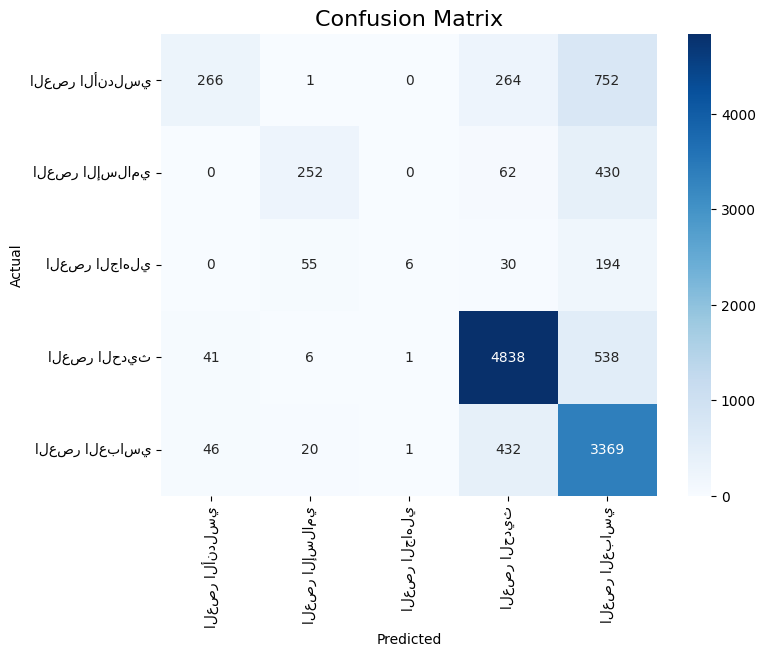

In [14]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test_vec)

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix", fontsize=16)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Recommendations and Future Work
```markdown
- Data Augmentation: Use more balanced datasets to address class imbalance for smaller categories.
- Feature Engineering: Incorporate additional linguistic features such as rhyme patterns or sentiment scores.
- Hyperparameter Tuning: Optimize the Logistic Regression model using grid search or random search for improved accuracy.
- Error Reduction: Investigate misclassifications and refine preprocessing or model architecture to handle edge cases better.
```

### Assumptions
```markdown
- TF-IDF adequately represents the importance of words within poems for classification.
- Logistic Regression is an appropriate baseline model for multi-class text classification.
- I have tried to experiment with deep learning models such as LSTMs. Also, Naive bayes and more. It gives less score than Logistic Regression.
```


### Conclusion
```markdown
The project successfully classified Arabic poetry into broader poet categories with a logistic regression model. While the initial accuracy is promising, there is room for improvement through more advanced techniques and better data preprocessing. Future efforts should focus on addressing class imbalance and leveraging advanced natural language processing models for higher accuracy.


In [15]:
import pickle

with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)